# Insight into the InD dataset

In [1]:
import json
from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
configs = json.load(open("../data/configs/inD.config","r"))
map_list = list(configs.keys())

## Duration of each track file

In [4]:
def duration(map_config):
    print("Map: "+map_config["map_name"])
    print("{:<15} {:<10}".format("Track file","Duration"))
    for file_id in map_config["track_files"]:
        df = pd.read_csv("../data/tracks/%s/%03d_tracks.csv" % (map_config["map_name"], file_id))
        print("{:<20} {:<10}".format(file_id, max(df["frame"]-min(df["frame"]))))

In [5]:
duration(configs[map_list[0]])

Map: I_inD_0_DEU
Track file      Duration  
0                    9610      
1                    10322     
2                    9055      
3                    10268     
4                    6476      
5                    9411      
6                    10960     


In [6]:
duration(configs[map_list[1]])

Map: I_inD_1_DEU
Track file      Duration  
7                    10552     
8                    10655     
9                    7836      
10                   8540      
11                   9015      
12                   11268     
13                   9946      
14                   10048     
15                   10830     
16                   12009     
17                   10504     


In [7]:
duration(configs[map_list[2]])

Map: I_inD_2_DEU
Track file      Duration  
18                   11196     
19                   9934      
20                   13016     
21                   12442     
22                   12316     
23                   12638     
24                   9548      
25                   12477     
26                   12992     
27                   13282     
28                   12693     
29                   12992     


In [8]:
duration(configs[map_list[3]])

Map: I_inD_3_DEU
Track file      Duration  
30                   10245     
31                   10257     
32                   10134     


## Trajectory Visualization

In [6]:
def trajectory_vis(map_config, type, all_files=True):
    file_list = map_config["track_files"] if all_files else [map_config["track_files"][0]]
    for file_id in file_list:
        df = pd.read_csv("../data/tracks/%s/%03d_tracks.csv" % (map_config["map_name"], file_id))
        df_sub = df[df["type"]==type]
        plt.scatter(df_sub["x"], df_sub["y"], s=0.01)
    fig = plt.gcf()
    fig.set_size_inches((8,6))
    plt.set_cmap("Set2")
    plt.show()

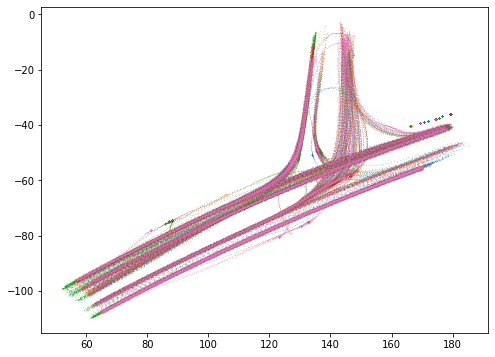

In [8]:
trajectory_vis(configs[map_list[0]], "car")

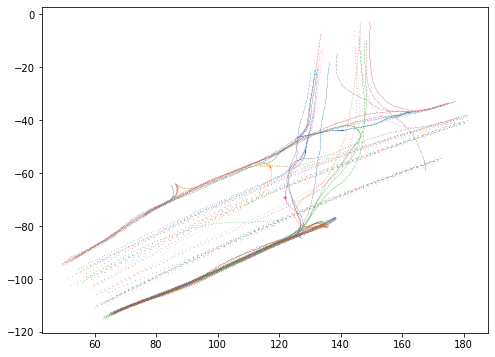

In [10]:
trajectory_vis(configs[map_list[0]], "bicycle")

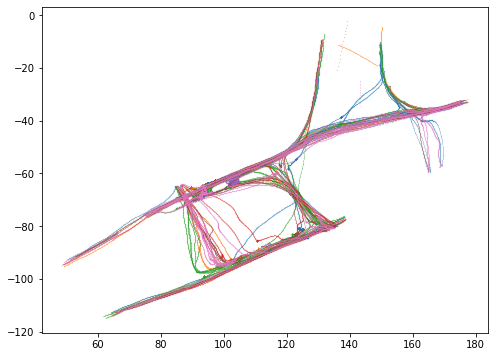

In [9]:
trajectory_vis(configs[map_list[0]], "pedestrian")

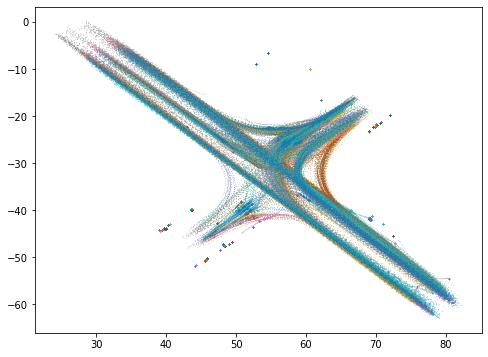

In [11]:
trajectory_vis(configs[map_list[1]], "car")

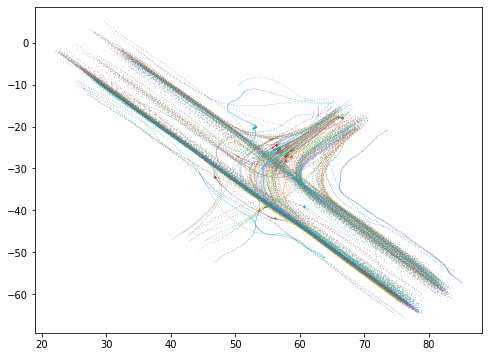

In [14]:
trajectory_vis(configs[map_list[1]], "bicycle")

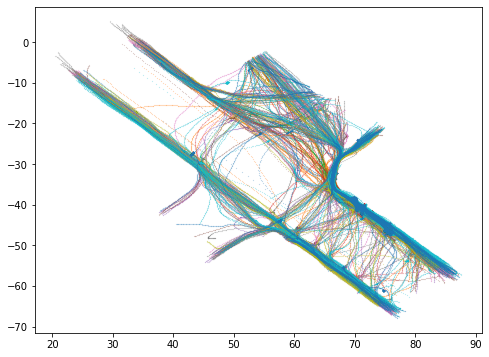

In [17]:
trajectory_vis(configs[map_list[1]], "pedestrian")

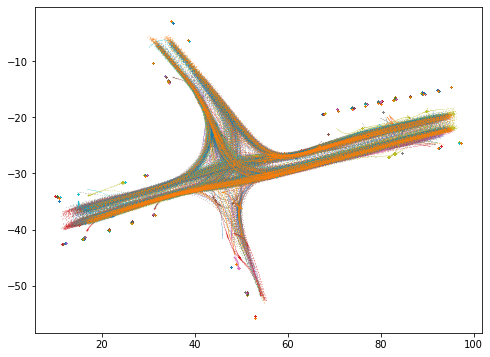

In [12]:
trajectory_vis(configs[map_list[2]], "car")

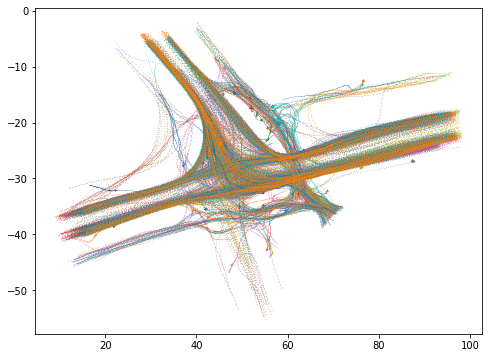

In [15]:
trajectory_vis(configs[map_list[2]], "bicycle")

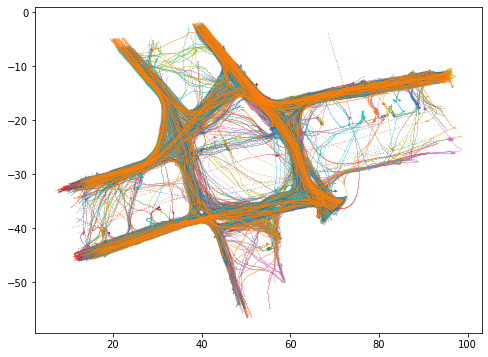

In [18]:
trajectory_vis(configs[map_list[2]], "pedestrian")

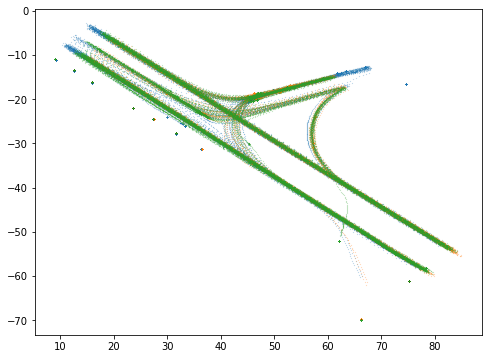

In [13]:
trajectory_vis(configs[map_list[3]], "car")

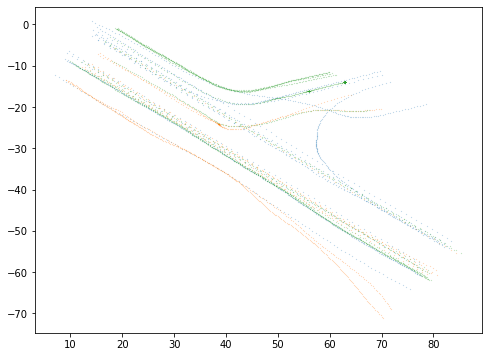

In [16]:
trajectory_vis(configs[map_list[3]], "bicycle")

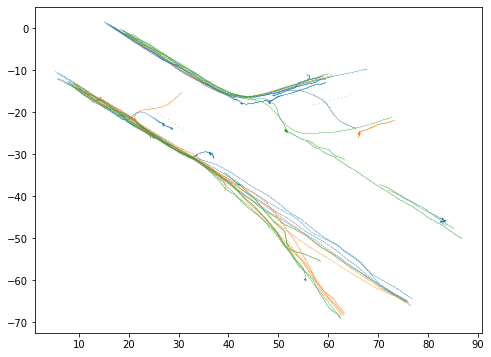

In [19]:
trajectory_vis(configs[map_list[3]], "pedestrian")

## Proportion of different agent type

In [9]:
def type_vis(map_config):
    type_set = set()
    type_count_dict = dict()
    for file_id in map_config["track_files"]:
        type_count = defaultdict(int)
        df = pd.read_csv("../data/tracks/%s/%03d_tracks.csv" % (map_config["map_name"], file_id))
        veh_ids = df["id"].unique()
        for veh_id in veh_ids:
            line_id = df[df["id"] == veh_id].index[0]
            type_count[df["type"].loc[line_id]] += 1
        type_set = type_set | set(type_count.keys())
        type_count_dict[file_id] = type_count
    df = pd.DataFrame(columns=sorted(type_set))
    i = 0
    for track_id, type_count in type_count_dict.items():
        df.at[i, "track_id"] = track_id
        total = 0
        for n in type_count.values():
            total += n
        print("There are in total %d agents in file %d" % (total, track_id))
        for type in type_set:
            df.at[i, type] = type_count[type] / total
        i += 1
    df.plot(
        x = "track_id",
        kind = "barh",
        stacked = True,
        title = map_config["map_name"],
        colormap="Set2", 
        mark_right = True)
    fig = plt.gcf()
    fig.set_size_inches((8, 0.5*len(df)))
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

There are in total 384 agents in file 0
There are in total 385 agents in file 1
There are in total 392 agents in file 2
There are in total 304 agents in file 3
There are in total 182 agents in file 4
There are in total 312 agents in file 5
There are in total 388 agents in file 6


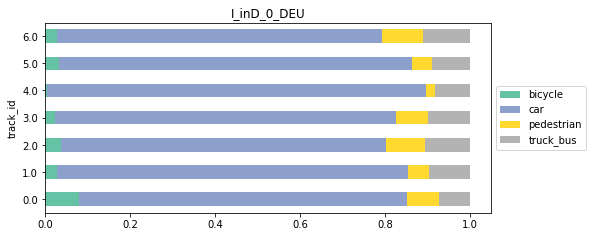

In [10]:
type_vis(configs[map_list[0]])

There are in total 212 agents in file 7
There are in total 415 agents in file 8
There are in total 236 agents in file 9
There are in total 253 agents in file 10
There are in total 305 agents in file 11
There are in total 410 agents in file 12
There are in total 357 agents in file 13
There are in total 379 agents in file 14
There are in total 345 agents in file 15
There are in total 450 agents in file 16
There are in total 376 agents in file 17


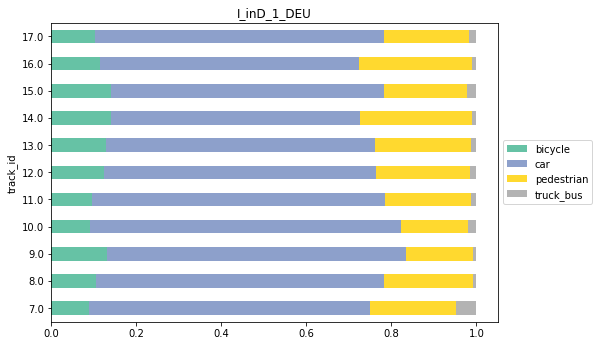

In [11]:
type_vis(configs[map_list[1]])

There are in total 427 agents in file 18
There are in total 370 agents in file 19
There are in total 499 agents in file 20
There are in total 550 agents in file 21
There are in total 562 agents in file 22
There are in total 575 agents in file 23
There are in total 423 agents in file 24
There are in total 539 agents in file 25
There are in total 547 agents in file 26
There are in total 594 agents in file 27
There are in total 536 agents in file 28
There are in total 613 agents in file 29


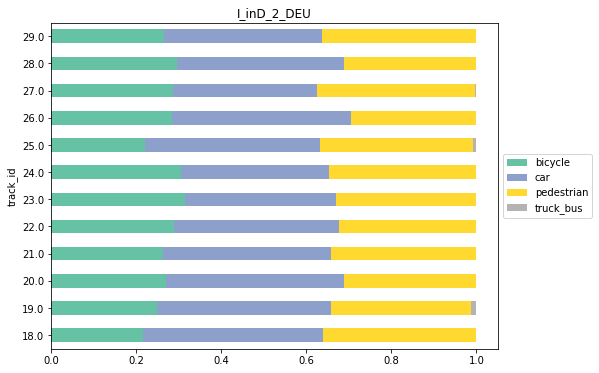

In [12]:
type_vis(configs[map_list[2]])

There are in total 411 agents in file 30
There are in total 401 agents in file 31
There are in total 467 agents in file 32


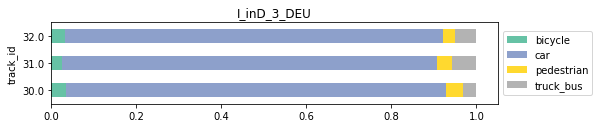

In [13]:
type_vis(configs[map_list[3]])

## Speed Distribution

In [14]:
types = ["bicycle", "car", "pedestrian", "truck_bus"]

In [15]:
def speed_dist_vis2(map_config):
    global types
    for type in types:
        for file_id in map_config["track_files"]:
            df = pd.read_csv("../data/tracks/%s/%03d_tracks.csv" % (map_config["map_name"], file_id))
            sns.distplot(df[(df["type"]==type) & (df["v"]>0.1)]["v"], label=file_id, hist=False)
            fig = plt.gcf()
            fig.set_size_inches((8,6))
            ax = plt.gca()
            ax.set_title(type)
        plt.set_cmap("Set2")
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()

We should notice that in track file 004, the speed of bicycle is very fast. A possible reason is that in the InD dataset, motorcycle is mixed with bicycle. We assume that this corner case will not bring serious problem to the training.

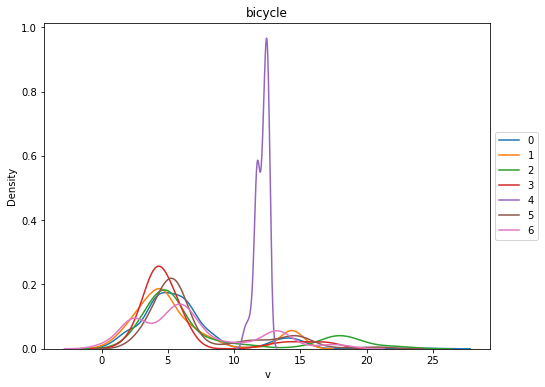

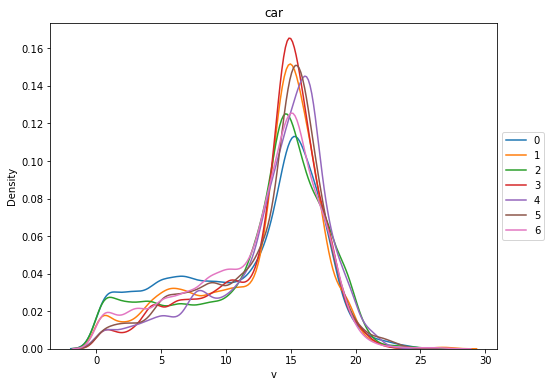

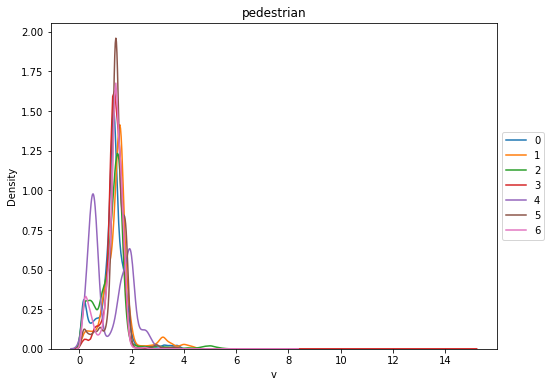

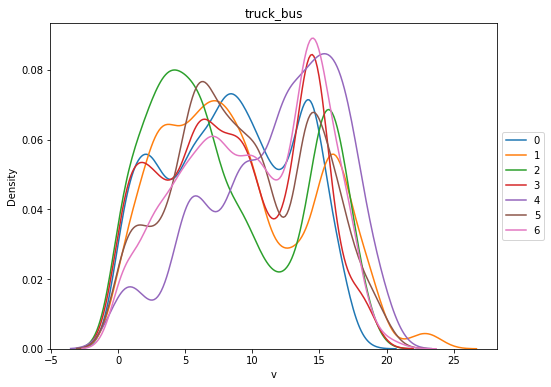

In [16]:
speed_dist_vis2(configs[map_list[0]])

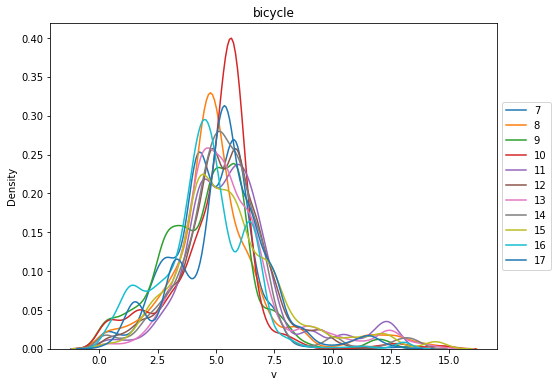

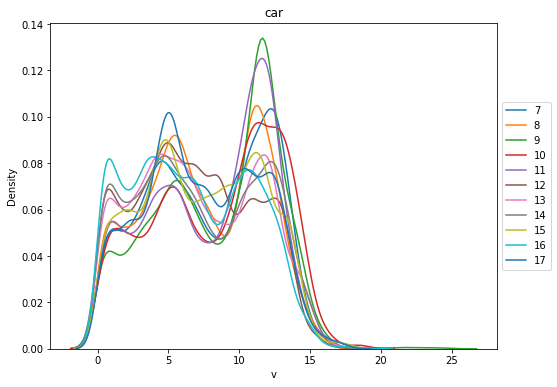

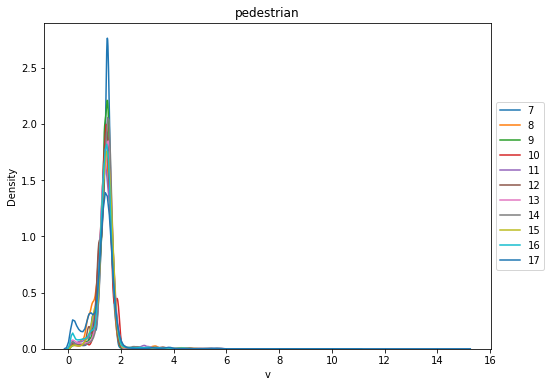

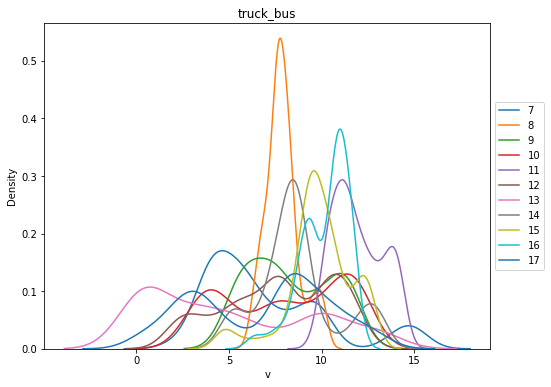

In [17]:
speed_dist_vis2(configs[map_list[1]])

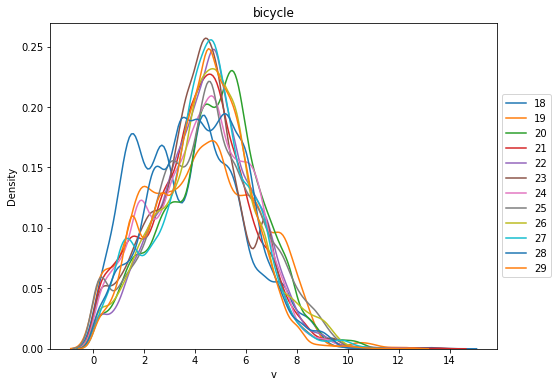

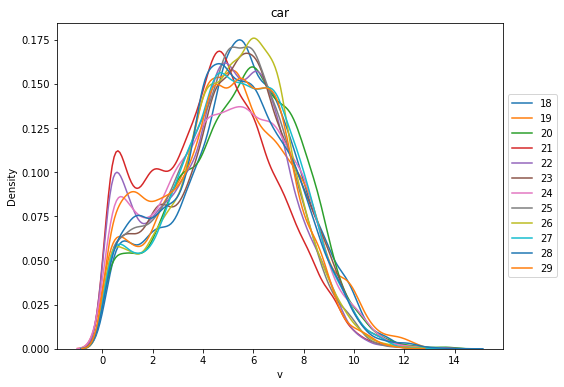

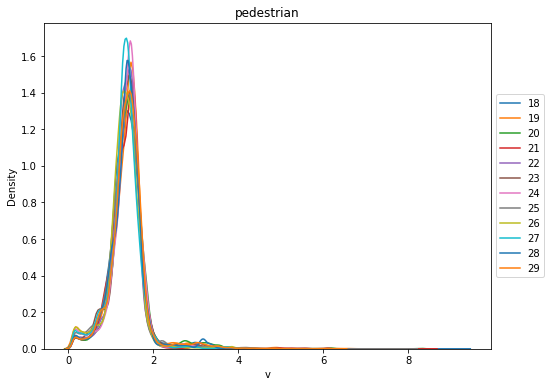

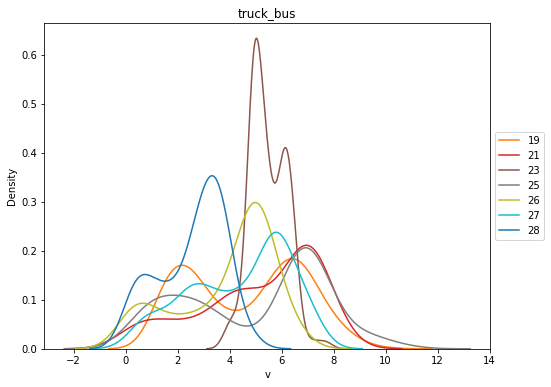

In [18]:
speed_dist_vis2(configs[map_list[2]])

## Angle Distribution

In [19]:
def angle_dist_vis(map_config, type, all_files=False):
    file_list = map_config["track_files"] if all_files else [map_config["track_files"][0]]
    for file_id in file_list:
        df = pd.read_csv("../data/tracks/%s/%03d_tracks.csv" % (map_config["map_name"], file_id))
        bin_num = 72
        theta = np.linspace(0.0, 2 * np.pi, bin_num, endpoint=False)
        angle = df[df["type"] == type]["angle"]
        for i, a in enumerate(angle):
            if a < 0:
                angle[i] = angle[i] + 2*np.pi
        radii = np.zeros(bin_num)
        for a in angle:
            radii[int(a/(2*np.pi/bin_num))] += 1
        ax = plt.subplot(111, polar=True)
        bars = ax.bar(theta, np.log10(radii), width=(2*np.pi)/bin_num, bottom=4)
        for r, bar in zip(radii, bars):
            bar.set_facecolor("turquoise")
            bar.set_alpha(0.5+0.5*r/sum(radii))
        fig = plt.gcf()
        fig.set_size_inches((6,6))
        ax = plt.gca()
        ax.set_title(file_id)
        plt.show()

The distribution of angle in all track files of map I_inD_0_DEU are similar, so we only plot the first file.

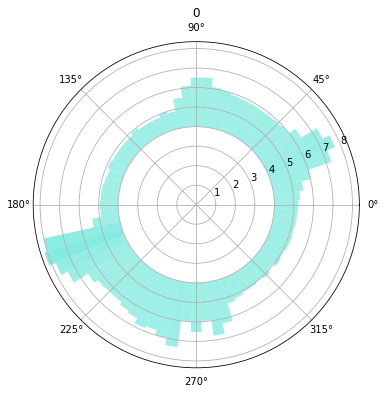

In [20]:
angle_dist_vis(configs[map_list[0]], "car")

The distribution of angle in all track files of map I_inD_1_DEU are similar, so we only plot the first file.

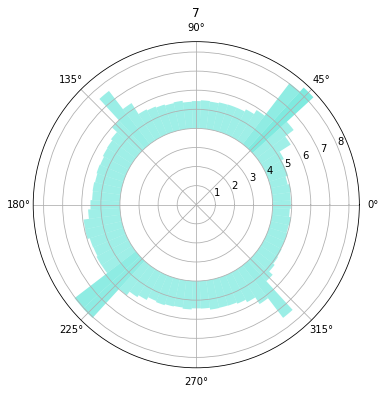

In [21]:
angle_dist_vis(configs[map_list[1]], "car")

The distribution of angle in all track files of map I_inD_2_DEU are similar, so we only plot the first file.

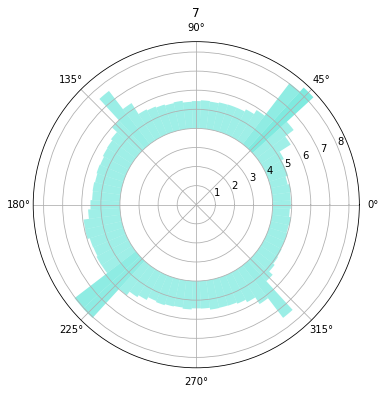

In [22]:
angle_dist_vis(configs[map_list[1]], "car")

The distribution of angle in all track files of map I_inD_3_DEU are similar, so we only plot the first file.

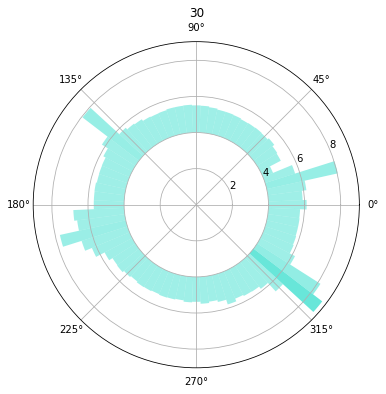

In [23]:
angle_dist_vis(configs[map_list[3]], "car")

In [24]:
def delta_angle_vis(map_config, type, all_files=False):
    file_list = map_config["track_files"] if all_files else [map_config["track_files"][0]]
    for file_id in file_list:
        df = pd.read_csv("../data/tracks/%s/%03d_tracks.csv" % (map_config["map_name"], file_id))
        df = df[df["type"]==type]
        delta_angle = []
        for veh_id in df["id"].unique():
            sub_angle_list = list(df[df["id"]==veh_id]["angle"])
            for i in range(0, len(sub_angle_list)-1):
                delta_angle.append(sub_angle_list[i+1]-sub_angle_list[i])
        sns.distplot(delta_angle, label=file_id, hist=False)
        fig = plt.gcf()
        fig.set_size_inches((8,6))
        ax = plt.gca()
        ax.set_title(type)
        ax.set_xlim(-np.pi, np.pi)
        plt.set_cmap("Set2")
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()

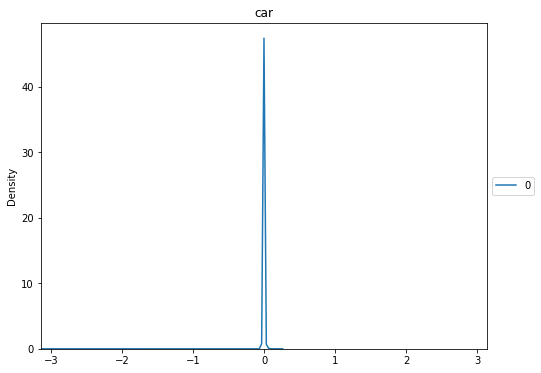

In [25]:
delta_angle_vis(configs[map_list[0]], "car")

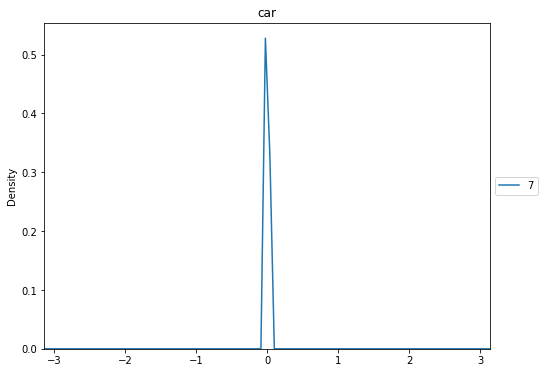

In [26]:
delta_angle_vis(configs[map_list[1]], "car")

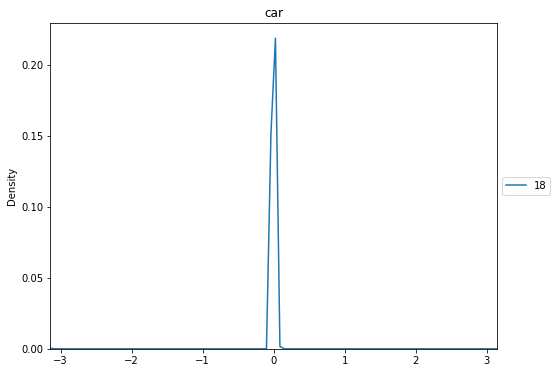

In [27]:
delta_angle_vis(configs[map_list[2]], "car")

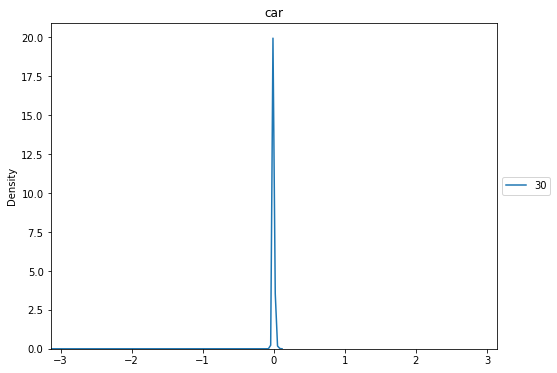

In [28]:
delta_angle_vis(configs[map_list[3]], "car")

## Traffic Density

In [8]:
def traffic_density_vis(map_config, x_lim, y_lim):
    for file_id in map_config["track_files"]:
        df = pd.read_csv("../data/tracks/%s/%03d_tracks.csv" % (map_config["map_name"], file_id))
        count = df.groupby(["frame", "type"]).size().unstack(level=1)
        count.plot(kind="line")
        ax = plt.gca()
        ax.set_xlim(x_lim)
        ax.set_ylim(y_lim)
        ax.set_title(file_id)
        fig = plt.gcf()
        fig.set_size_inches((8, 6))
        plt.set_cmap("Set2")
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()

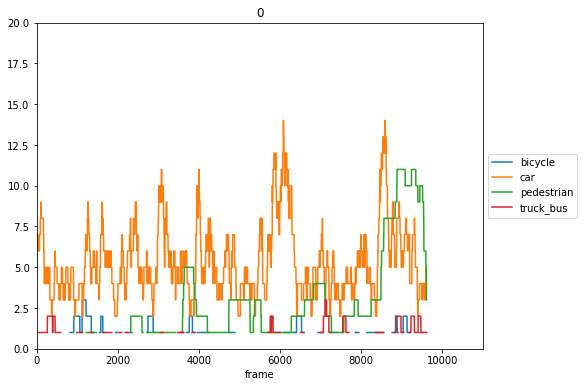

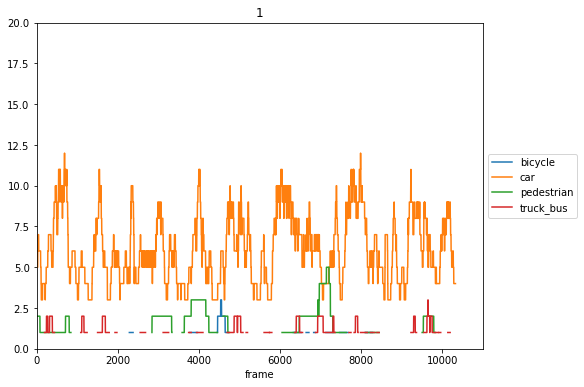

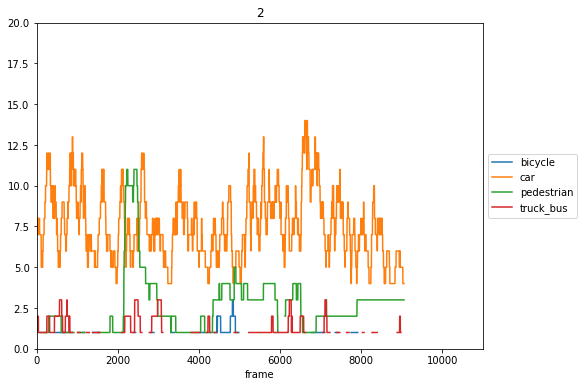

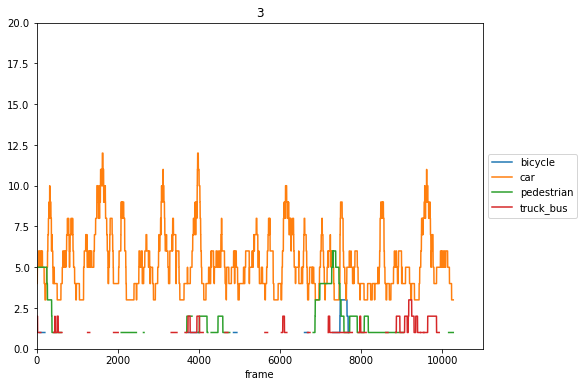

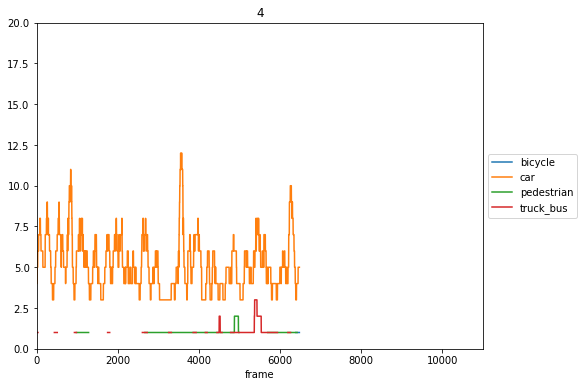

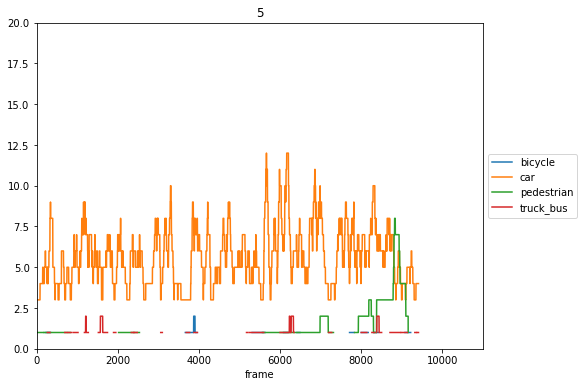

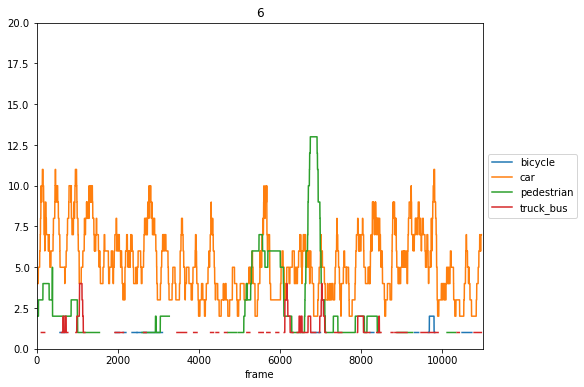

In [9]:
traffic_density_vis(configs[map_list[0]], [0,11000], [0,20])

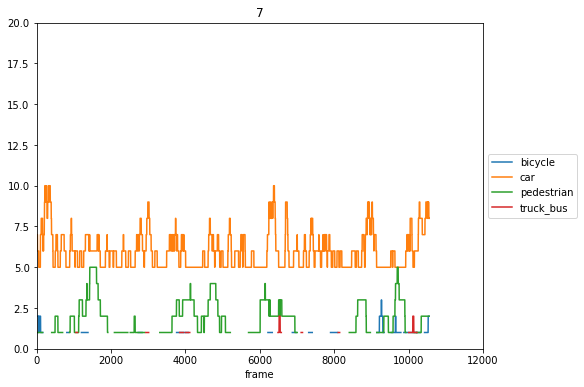

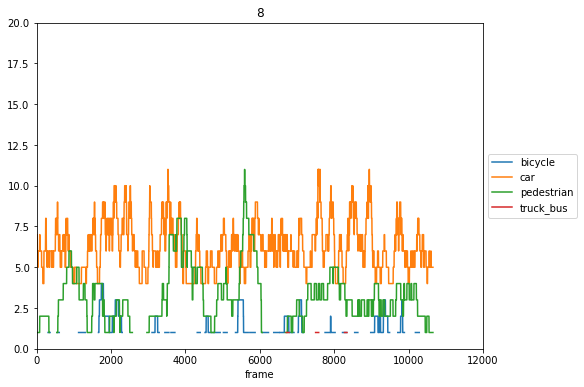

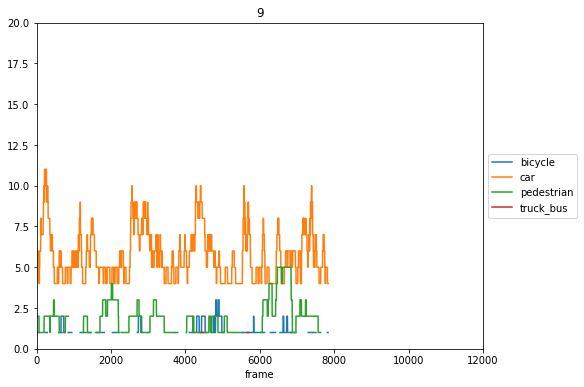

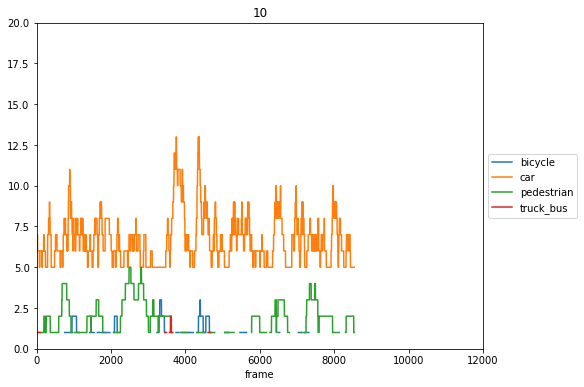

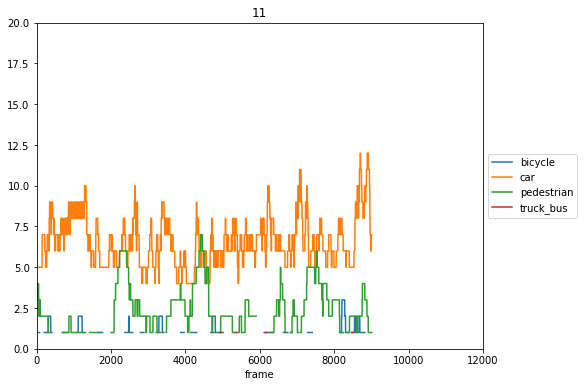

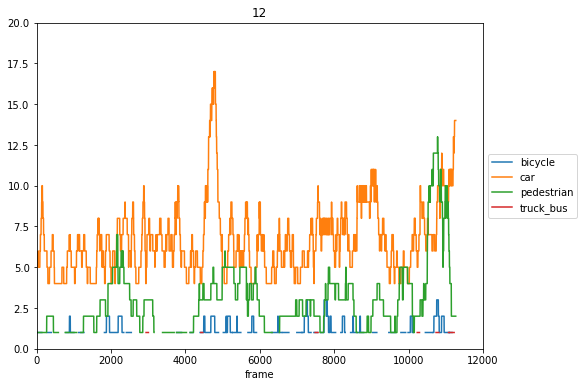

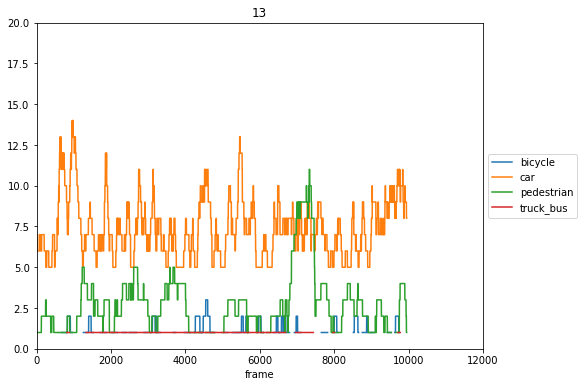

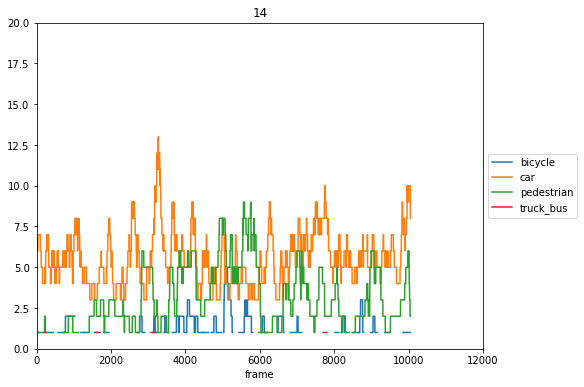

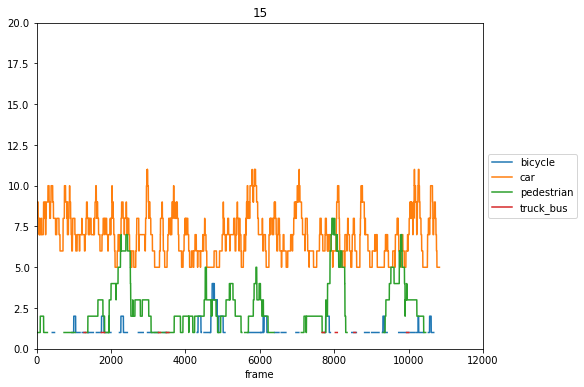

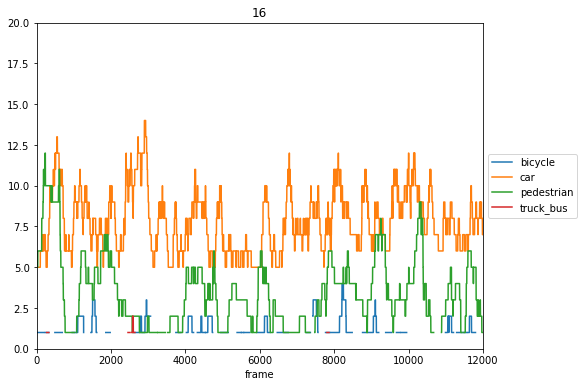

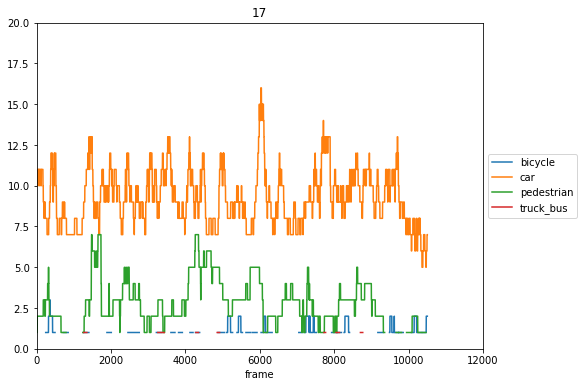

In [10]:
traffic_density_vis(configs[map_list[1]], [0,12000], [0,20])

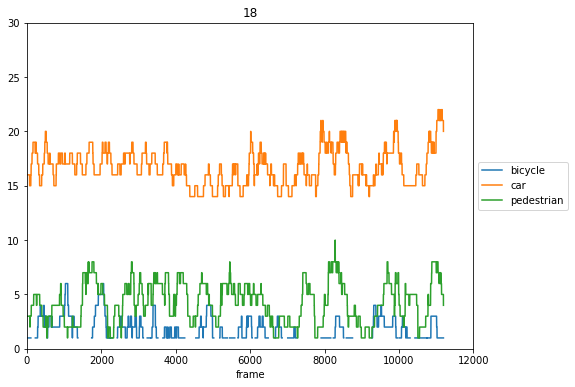

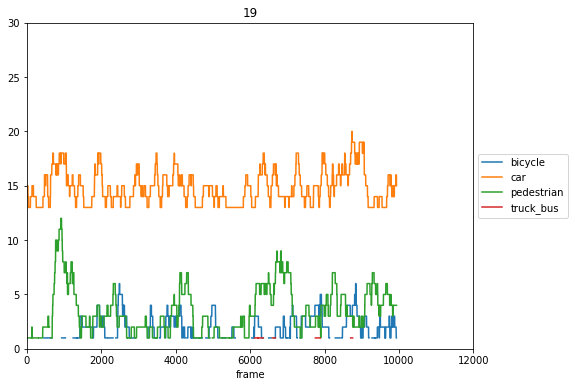

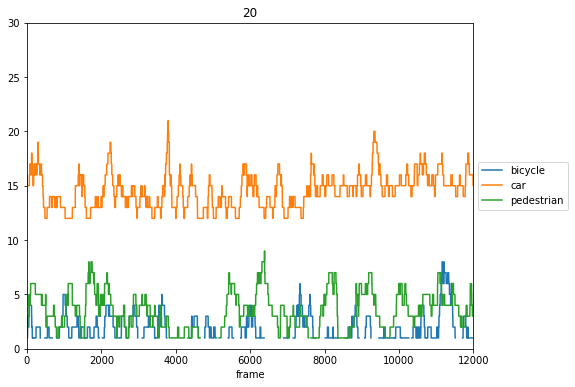

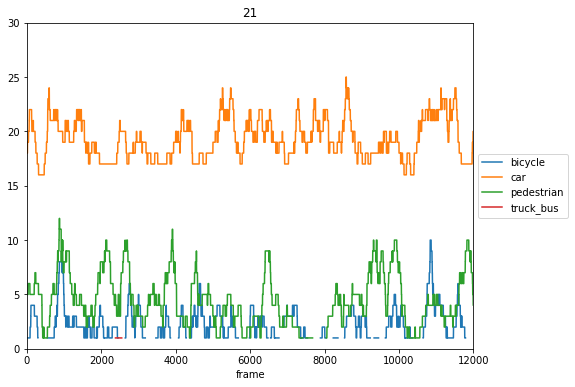

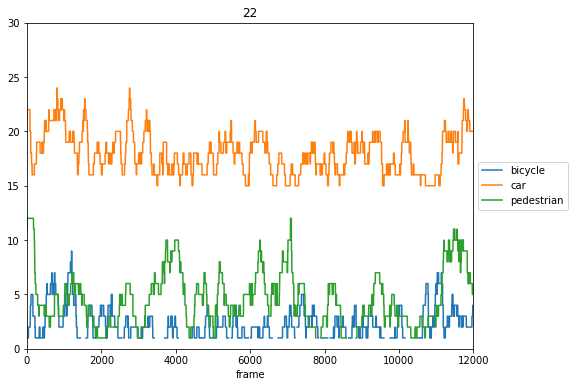

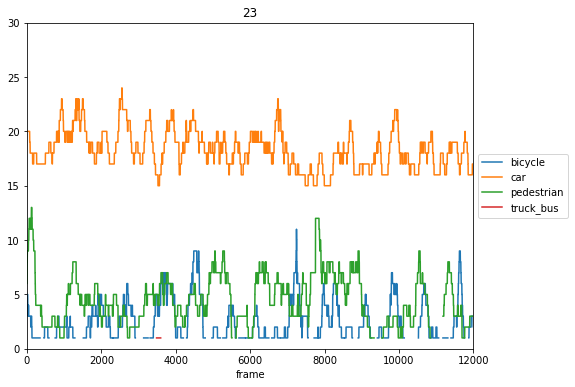

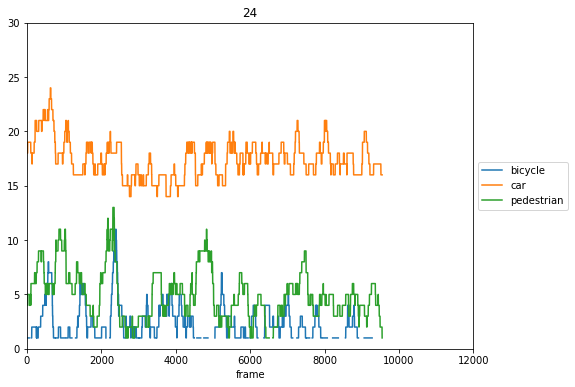

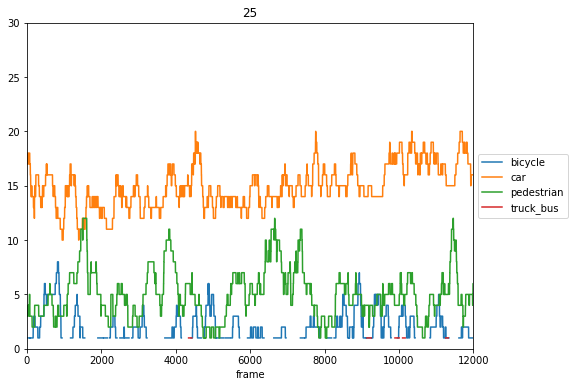

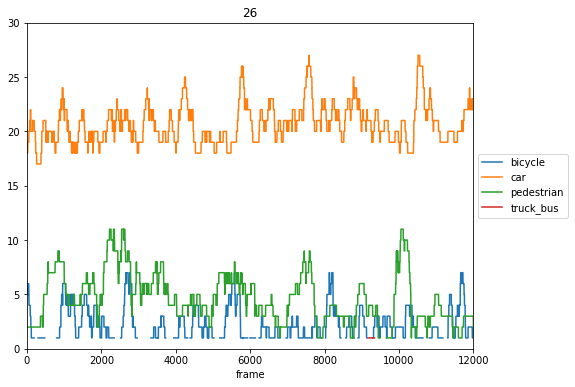

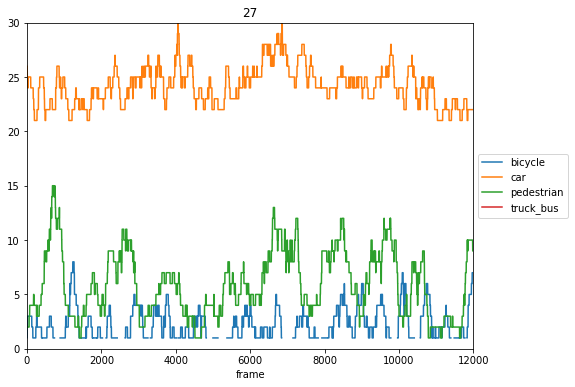

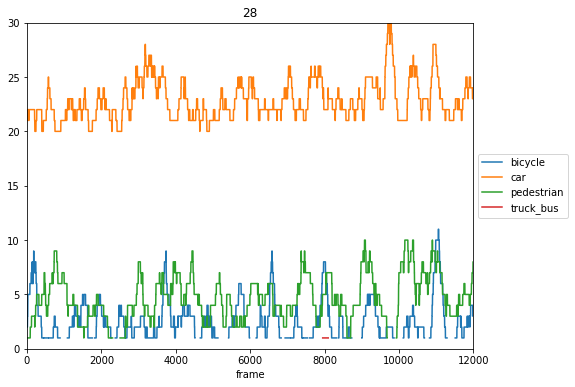

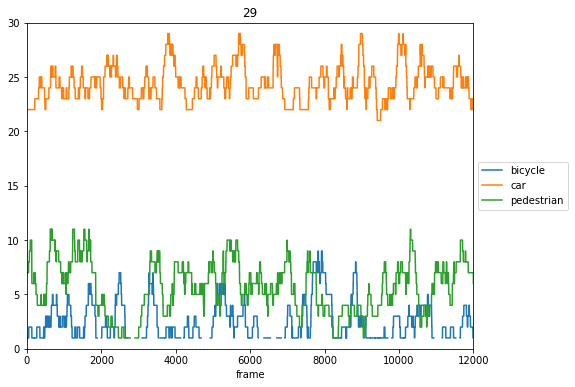

In [11]:
traffic_density_vis(configs[map_list[2]], [0,12000], [0,30])

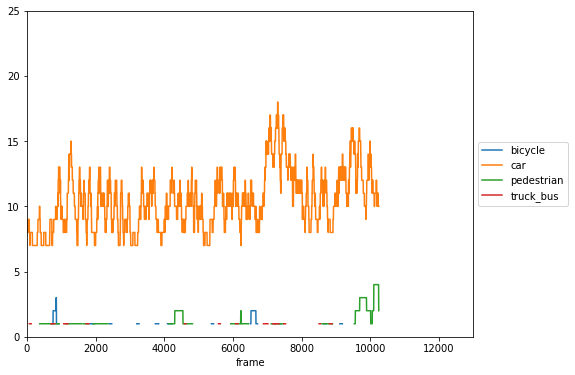

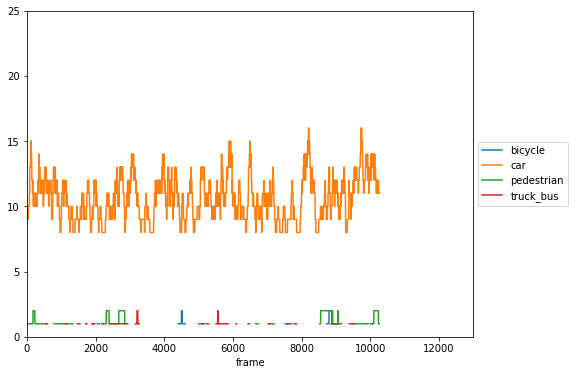

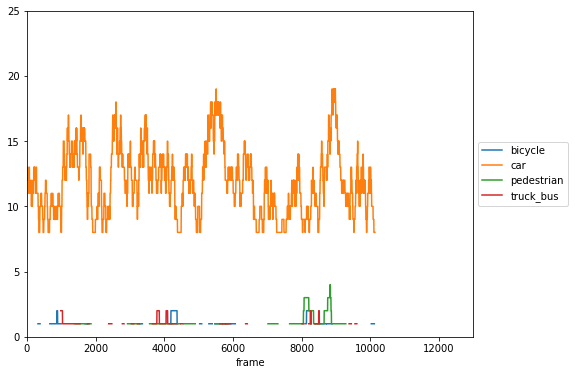

In [33]:
traffic_density_vis(configs[map_list[3]])